In [48]:
#https://github.com/MorvanZhou/Tensorflow-Tutorial/blob/master/tutorial-contents/404_AutoEncoder.py
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
import pandas as pd
%matplotlib inline

In [49]:
tf.set_random_seed(1)

# Hyper Parameters
BATCH_SIZE = 64
LR = 0.002         # learning rate
N_TEST_IMG = 5

data = pd.read_csv('imgs_720feature_2.csv', header = 0)
print(data.shape)
feature = pd.DataFrame.as_matrix(data.iloc[:,2:722])
record = pd.DataFrame.as_matrix(data.iloc[:,1:2])
print(feature.shape)
print(record.shape)

(224, 722)
(224, 720)
(224, 1)


In [50]:
from sklearn.cross_validation import train_test_split
train_x, test_x, train_y, test_y = train_test_split(feature, record, test_size = 0.25, random_state = 0)

print(train_x.shape,train_y.shape)
print(test_x.shape,test_y.shape)

(168, 720) (168, 1)
(56, 720) (56, 1)


In [51]:
# tf placeholder
tf_x = tf.placeholder(tf.float32, [None, 60*12]) # value in the range of (0, 1)
print(tf_x.shape)

# encoder
en0 = tf.layers.dense(tf_x, 128, tf.nn.tanh)
en1 = tf.layers.dense(en0, 64, tf.nn.tanh)
en2 = tf.layers.dense(en1, 12, tf.nn.tanh)
encoded = tf.layers.dense(en2, 3)

# decoder
de0 = tf.layers.dense(encoded, 12, tf.nn.tanh)
de1 = tf.layers.dense(de0, 64, tf.nn.tanh)
de2 = tf.layers.dense(de1, 128, tf.nn.tanh)
decoded = tf.layers.dense(de2, 60*12, tf.nn.sigmoid)

loss = tf.losses.mean_squared_error(labels=tf_x, predictions=decoded)
train = tf.train.AdamOptimizer(LR).minimize(loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

(?, 720)


train loss: 14194649088.0000
train loss: 11726391296.0000
train loss: 18948970496.0000
train loss: 30855618560.0000
train loss: 10893516800.0000
train loss: 19486937088.0000
train loss: 27119024128.0000
train loss: 3196281088.0000
train loss: 15884904448.0000
train loss: 15876021248.0000
train loss: 3509179648.0000
train loss: 7687562752.0000
train loss: 2999279104.0000
train loss: 1786439296.0000
train loss: 10404788224.0000
train loss: 18094084096.0000
train loss: 20468244480.0000
train loss: 11774399488.0000
train loss: 9826761728.0000
train loss: 29224093696.0000
train loss: 20487886848.0000
train loss: 15179982848.0000
train loss: 6269217280.0000
train loss: 12858469376.0000
train loss: 5614461952.0000
train loss: 17261127680.0000
train loss: 19020972032.0000
train loss: 5827442176.0000
train loss: 14877817856.0000
train loss: 2475578368.0000
train loss: 24953927680.0000
train loss: 22033438720.0000
train loss: 16325891072.0000
train loss: 31733620736.0000
train loss: 12727236608.

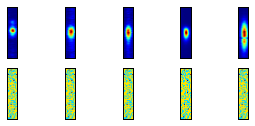

In [52]:
# initialize figure
f, a = plt.subplots(2, N_TEST_IMG, figsize=(5, 2))
plt.ion() # continuously plot
# original data (first row) for viewing
view_data = test_x[:N_TEST_IMG]
for i in range(N_TEST_IMG):
    a[0][i].imshow(np.reshape(view_data[i], (60, 12)))
    a[0][i].set_xticks(()); a[0][i].set_yticks(())

for step in range(8000):
    #b_x, b_y = train_x.next_batch(BATCH_SIZE)
    random_select = np.random.randint(0,len(train_y), BATCH_SIZE)
    xs = [train_x[k] for k in random_select]
    ys = [train_y[k] for k in random_select] 
    
    b_x = np.array(xs)
    b_y = np.array(ys)
    
    _, encoded_, decoded_, loss_ = sess.run([train, encoded, decoded, loss], {tf_x: b_x})

    if step % 100 == 0:     # plotting
        print('train loss: %.4f' % loss_)
        # plotting decoded image (second row)
        decoded_data = sess.run(decoded, {tf_x: view_data})
        for i in range(N_TEST_IMG):
            a[1][i].clear()
            a[1][i].imshow(np.reshape(decoded_data[i], (60, 12)))
            a[1][i].set_xticks(()); a[1][i].set_yticks(())
        plt.draw(); plt.pause(0.01)
plt.ioff()

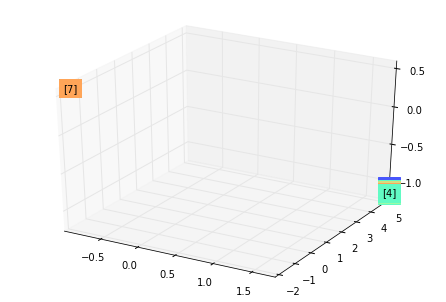

In [55]:
# visualize in 3D plot
view_data = test_x[:200]
encoded_data = sess.run(encoded, {tf_x: view_data})
fig = plt.figure(2); ax = Axes3D(fig)
X, Y, Z = encoded_data[:, 0], encoded_data[:, 1], encoded_data[:, 2]
for x, y, z, s in zip(X, Y, Z, test_y):
    c = cm.rainbow(int(255*s/9)); ax.text(x, y, z, s, backgroundcolor=c)
ax.set_xlim(X.min(), X.max()); ax.set_ylim(Y.min(), Y.max()); ax.set_zlim(Z.min(), Z.max())
plt.show()

In [56]:
np.savetxt('/Users/shuixinjiang/Desktop/DATS6203/Final/ae_data.csv',encoded_data,delimiter=',')

## AutoEncoder on Normalization Data (MinMax)

In [78]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
import pandas as pd
%matplotlib inline

tf.set_random_seed(1)

# Hyper Parameters
BATCH_SIZE = 64
LR = 0.002         # learning rate
N_TEST_IMG = 10

data = pd.read_csv('minmax_data.csv', header = 0)
print(data.shape)
feature = pd.DataFrame.as_matrix(data.iloc[:,2:722])
record = pd.DataFrame.as_matrix(data.iloc[:,0:1])
print(feature.shape)
print(record.shape)

from sklearn.cross_validation import train_test_split
train_x, test_x, train_y, test_y = train_test_split(feature, record, test_size = 0.25, random_state = 0)

print(train_x.shape,train_y.shape)
print(test_x.shape,test_y.shape)

(224, 722)
(224, 720)
(224, 1)
(168, 720) (168, 1)
(56, 720) (56, 1)


In [79]:
# tf placeholder
tf_x = tf.placeholder(tf.float32, [None, 60*12]) # value in the range of (0, 1)
print(tf_x.shape)

# encoder
en0 = tf.layers.dense(tf_x, 128, tf.nn.tanh)
en1 = tf.layers.dense(en0, 64, tf.nn.tanh)
en2 = tf.layers.dense(en1, 12, tf.nn.tanh)
encoded = tf.layers.dense(en2, 3)

# decoder
de0 = tf.layers.dense(encoded, 12, tf.nn.tanh)
de1 = tf.layers.dense(de0, 64, tf.nn.tanh)
de2 = tf.layers.dense(de1, 128, tf.nn.tanh)
decoded = tf.layers.dense(de2, 60*12, tf.nn.sigmoid)

loss = tf.losses.mean_squared_error(labels=tf_x, predictions=decoded)
train = tf.train.AdamOptimizer(LR).minimize(loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

(?, 720)


train loss: 0.1618
train loss: 0.0144
train loss: 0.0074
train loss: 0.0046
train loss: 0.0047
train loss: 0.0042
train loss: 0.0037
train loss: 0.0039
train loss: 0.0043
train loss: 0.0032
train loss: 0.0031
train loss: 0.0032
train loss: 0.0036
train loss: 0.0033
train loss: 0.0025
train loss: 0.0029
train loss: 0.0029
train loss: 0.0024
train loss: 0.0027
train loss: 0.0024
train loss: 0.0024
train loss: 0.0021
train loss: 0.0024
train loss: 0.0019
train loss: 0.0020
train loss: 0.0017
train loss: 0.0018
train loss: 0.0018
train loss: 0.0020
train loss: 0.0017
train loss: 0.0017
train loss: 0.0013
train loss: 0.0015
train loss: 0.0015
train loss: 0.0016
train loss: 0.0016
train loss: 0.0017
train loss: 0.0014
train loss: 0.0012
train loss: 0.0015
train loss: 0.0009
train loss: 0.0013
train loss: 0.0014
train loss: 0.0011
train loss: 0.0011
train loss: 0.0012
train loss: 0.0011
train loss: 0.0013
train loss: 0.0011
train loss: 0.0010
train loss: 0.0010
train loss: 0.0009
train loss: 

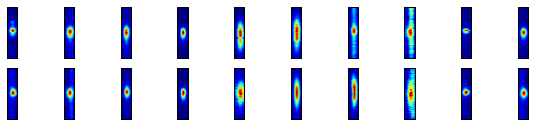

In [80]:
# initialize figure
f, a = plt.subplots(2, N_TEST_IMG, figsize=(10, 2))
plt.ion() # continuously plot
# original data (first row) for viewing
view_data = test_x[:N_TEST_IMG]
for i in range(N_TEST_IMG):
    a[0][i].imshow(np.reshape(view_data[i], (60, 12)))
    a[0][i].set_xticks(()); a[0][i].set_yticks(())

for step in range(8000):
    #b_x, b_y = train_x.next_batch(BATCH_SIZE)
    random_select = np.random.randint(0,len(train_y), BATCH_SIZE)
    xs = [train_x[k] for k in random_select]
    ys = [train_y[k] for k in random_select] 
    
    b_x = np.array(xs)
    b_y = np.array(ys)
    
    _, encoded_, decoded_, loss_ = sess.run([train, encoded, decoded, loss], {tf_x: b_x})

    if step % 100 == 0:     # plotting
        print('train loss: %.4f' % loss_)
        # plotting decoded image (second row)
        decoded_data = sess.run(decoded, {tf_x: view_data})
        for i in range(N_TEST_IMG):
            a[1][i].clear()
            a[1][i].imshow(np.reshape(decoded_data[i], (60, 12)))
            a[1][i].set_xticks(()); a[1][i].set_yticks(())
        plt.draw(); plt.pause(0.01)
plt.ioff()

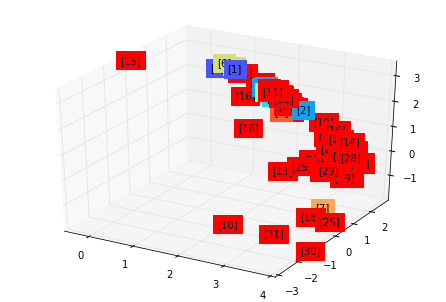

In [71]:
# train: visualize in 3D plot 
view_data = test_x[:200]
encoded_data = sess.run(encoded, {tf_x: view_data})
fig = plt.figure(2); ax = Axes3D(fig)
X, Y, Z = encoded_data[:, 0], encoded_data[:, 1], encoded_data[:, 2]
for x, y, z, s in zip(X, Y, Z, test_y):
    c = cm.rainbow(int(255*s/9)); ax.text(x, y, z, s, backgroundcolor=c)
ax.set_xlim(X.min(), X.max()); ax.set_ylim(Y.min(), Y.max()); ax.set_zlim(Z.min(), Z.max())
plt.show()

In [72]:
np.savetxt('/Users/shuixinjiang/Desktop/DATS6203/Final/encoded_data.csv',encoded_data,delimiter=',')


In [73]:
#test_y
np.savetxt('/Users/shuixinjiang/Desktop/DATS6203/Final/encoded_data_label.csv',test_y,delimiter=',')


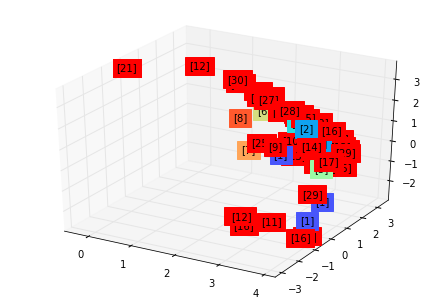

In [74]:
# test:  visualize in 3D plot
view_data = train_x[:200]
encoded_data = sess.run(encoded, {tf_x: view_data})
fig = plt.figure(2); ax = Axes3D(fig)
X, Y, Z = encoded_data[:, 0], encoded_data[:, 1], encoded_data[:, 2]
for x, y, z, s in zip(X, Y, Z, test_y):
    c = cm.rainbow(int(255*s/9)); ax.text(x, y, z, s, backgroundcolor=c)
ax.set_xlim(X.min(), X.max()); ax.set_ylim(Y.min(), Y.max()); ax.set_zlim(Z.min(), Z.max())
plt.show()

In [77]:
#train
np.savetxt('/Users/shuixinjiang/Desktop/DATS6203/Final/encoded_data.csv',encoded_data,delimiter=',')
#test
np.savetxt('/Users/shuixinjiang/Desktop/DATS6203/Final/encoded_data_label.csv',train_y,delimiter=',')
